<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [ ]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [ ]:
data = pd.read_csv('train.csv')

In [ ]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

Проведем общий анализ данных.

1) Посмотрите на случайные строчки.

In [ ]:
data.sample(10)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
5200,13,30.85,394.1,Female,0,No,No,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),0
2671,50,84.40,4116.15,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),1
1592,61,100.70,6018.65,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,No,Yes,One year,Yes,Credit card (automatic),0
2399,14,75.10,1013.35,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,0
2144,50,20.15,970.85,Female,0,No,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
4693,24,70.30,1706.45,Male,0,Yes,Yes,Yes,No,DSL,Yes,Yes,No,Yes,No,Yes,Month-to-month,Yes,Credit card (automatic),0
2526,44,90.40,4063,Male,0,No,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,Yes,Month-to-month,Yes,Mailed check,0
506,70,115.65,7968.85,Male,0,Yes,No,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,No,Credit card (automatic),1
5279,1,55.05,55.05,Male,0,No,No,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Mailed check,0
1286,38,84.10,3187.65,Female,0,No,No,Yes,Yes,DSL,Yes,Yes,Yes,No,Yes,Yes,One year,No,Bank transfer (automatic),0


2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [ ]:
data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

Пропущенных данных Nan нет.

При этом в некоторых столбцах есть некорректные пустые значения. Заменим их.

In [ ]:
data[data.TotalSpent == ' '].sample(3)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
4598,0,56.05,,Female,0,Yes,Yes,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),0
3078,0,80.85,,Female,0,Yes,Yes,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,0
4551,0,52.55,,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),0


In [ ]:
data.loc[data[data.TotalSpent==' '].index, "TotalSpent"] = 0
data[data.TotalSpent==' '].head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn


## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

1) Для численных призанков постройте гистограмму (plt.hist(...)) или boxplot (plt.boxplot(...)). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать data.value_counts() и построить bar диаграммы plt.bar(...) или круговые диаграммы plt.pie(...) (хорошо, елси вы сможете это сделать на одном гарфике с помощью plt.subplots(...)).

Для численных призанков постройте гистограмму (plt.hist(...)) или boxplot (plt.boxplot(...)). 

Проанализируем численные признаки:

In [ ]:
data[num_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ClientPeriod     5282 non-null   int64  
 1   MonthlySpending  5282 non-null   float64
 2   TotalSpent       5282 non-null   object 
dtypes: float64(1), int64(1), object(1)
memory usage: 123.9+ KB


Приведем столбец TotalSpent к численному виду:

In [ ]:
data['TotalSpent'] = data['TotalSpent'].astype('float')

Для числовых показателей построим гистограммы и box-plot.

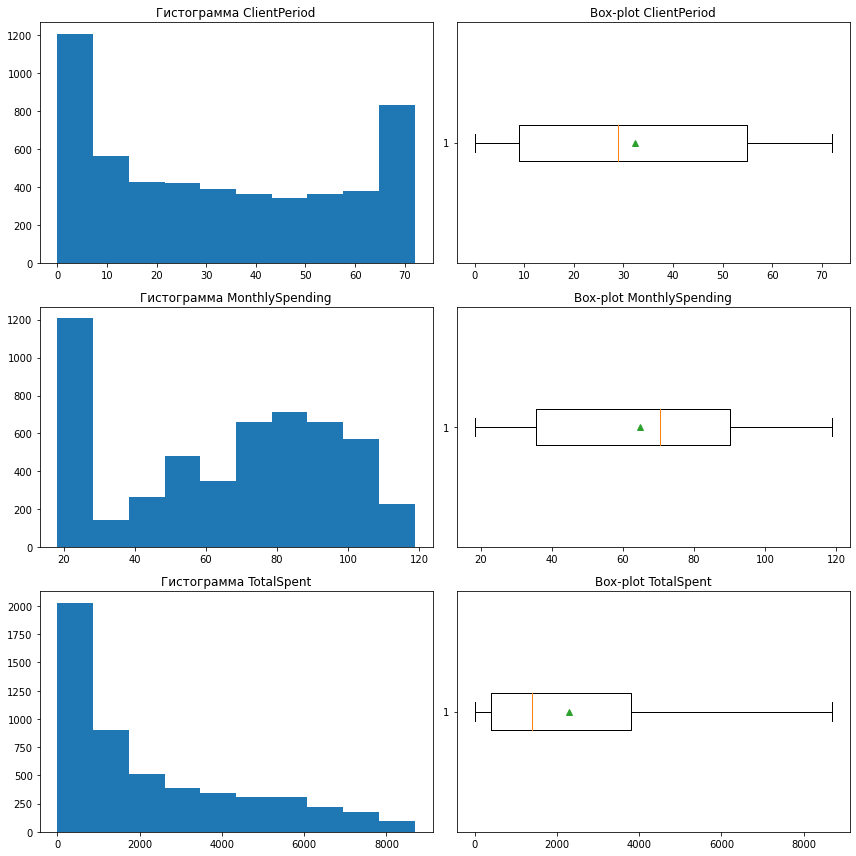

In [ ]:
fig, ax = plt.subplots(len(num_cols), 2, figsize=(12, 4*len(num_cols)))
plot_name = ['Гистограмма ', 'Box-plot ']
for idx, col in enumerate(num_cols):
    ax[idx,0].hist(data[col])
    ax[idx,0].set_title(plot_name[0] + col)
    ax[idx,1].boxplot(data[col], 0, showmeans=True, showfliers=True, vert=False)
    ax[idx,1].set_title(plot_name[1] + col)
plt.tight_layout()
fig.show()

Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать data.value_counts() и построить bar диаграммы plt.bar(...) или круговые диаграммы plt.pie(...) (хорошо, елси вы сможете это сделать на одном гарфике с помощью plt.subplots(...)).

Проанализируем категориальные признаки.

In [ ]:
# Посмотрим на распределение категориальных признаков
for col in cat_cols:
    print(f"{col} Distribution")
    print(data[col].value_counts())
    print()

Sex Distribution
Male      2655
Female    2627
Name: Sex, dtype: int64

IsSeniorCitizen Distribution
0    4440
1     842
Name: IsSeniorCitizen, dtype: int64

HasPartner Distribution
No     2705
Yes    2577
Name: HasPartner, dtype: int64

HasChild Distribution
No     3676
Yes    1606
Name: HasChild, dtype: int64

HasPhoneService Distribution
Yes    4761
No      521
Name: HasPhoneService, dtype: int64

HasMultiplePhoneNumbers Distribution
No                  2511
Yes                 2250
No phone service     521
Name: HasMultiplePhoneNumbers, dtype: int64

HasInternetService Distribution
Fiber optic    2341
DSL            1800
No             1141
Name: HasInternetService, dtype: int64

HasOnlineSecurityService Distribution
No                     2612
Yes                    1529
No internet service    1141
Name: HasOnlineSecurityService, dtype: int64

HasOnlineBackup Distribution
No                     2332
Yes                    1809
No internet service    1141
Name: HasOnlineBackup, dty

И построим bar диаграммы plt.bar(...) и круговые диаграммы plt.pie(...).

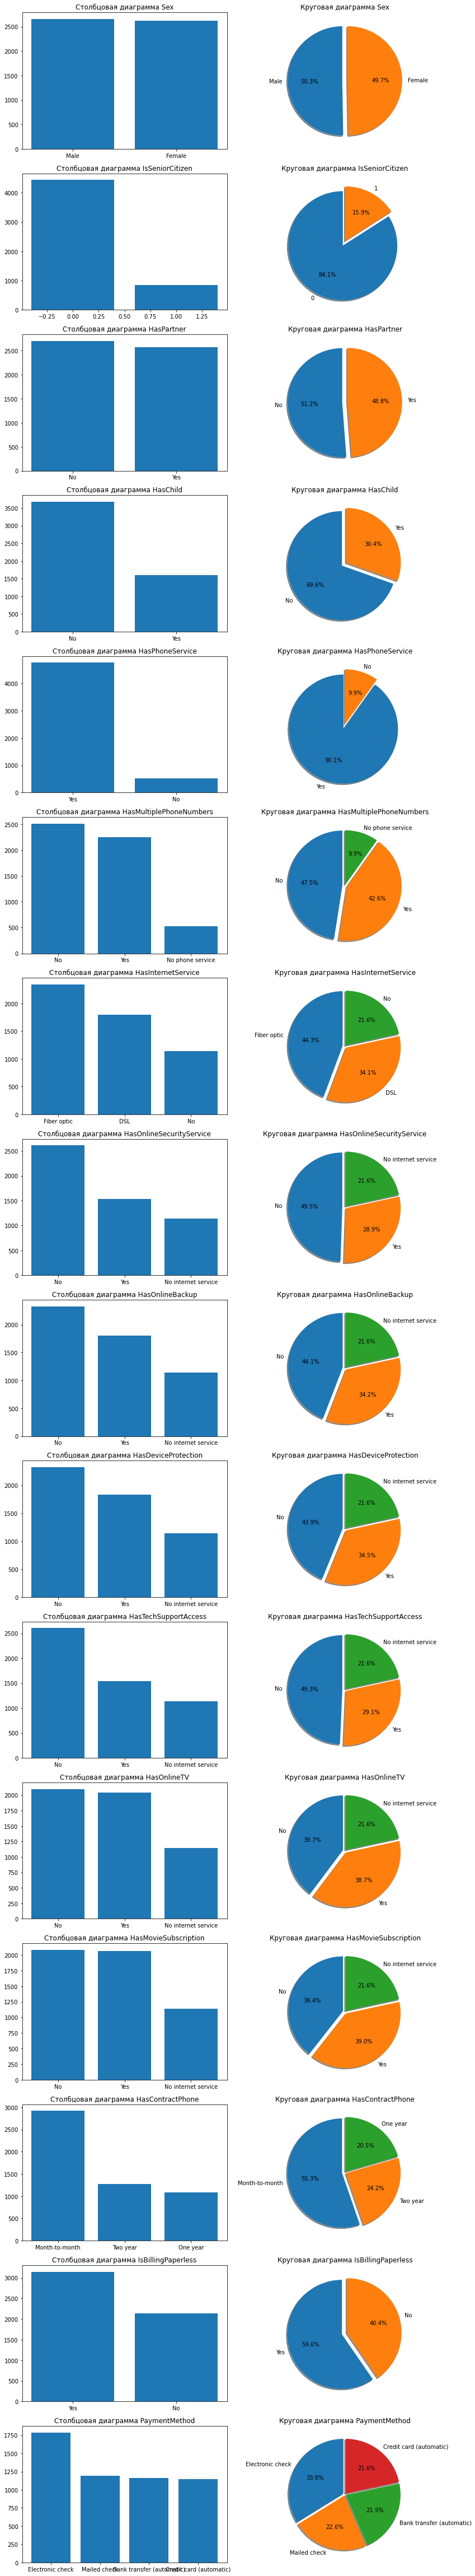

In [ ]:
fig, ax = plt.subplots(len(cat_cols), 2, figsize=(12, 4*len(cat_cols)))
plot_name = ['Столбцовая диаграмма ', 'Круговая диаграмма ']
for idx, col in enumerate(cat_cols):
    dt = data[col].value_counts()
    ax[idx,0].bar(dt.index, dt.values)
    ax[idx,0].set_title(plot_name[0] + col)
    explode=[dt.values[i]/dt.values.sum()/10 for i in range(len(dt))]
    ax[idx,1].pie(dt.values, labels=dt.index, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90);
    ax[idx,1].set_title(plot_name[1] + col)
plt.tight_layout()
fig.show()

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

Изучим распределение целевой переменной.

In [ ]:
print(f"{target_col} Distribution")
print(data[target_col].value_counts())

Churn Distribution
0    3898
1    1384
Name: Churn, dtype: int64


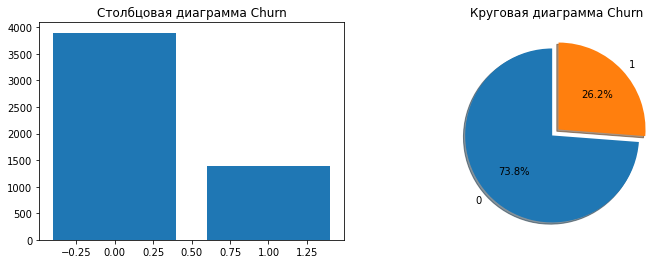

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
col = target_col
dt = data[col].value_counts()
ax[0].bar(dt.index, dt.values)
ax[0].set_title(plot_name[0] + col)
explode=[dt.values[i]/dt.values.sum()/10 for i in range(len(dt))]
ax[1].pie(dt.values, labels=dt.index, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90);
ax[1].set_title(plot_name[1] + col);
fig.show()

Мы видим, что отношение классов примерно 3 к 1, а потому можем сказать, что классы являются несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - sns, pandas_visual_analysis, etc.

Построим график зависимости переменных в зависимости от значения целевого показателя.

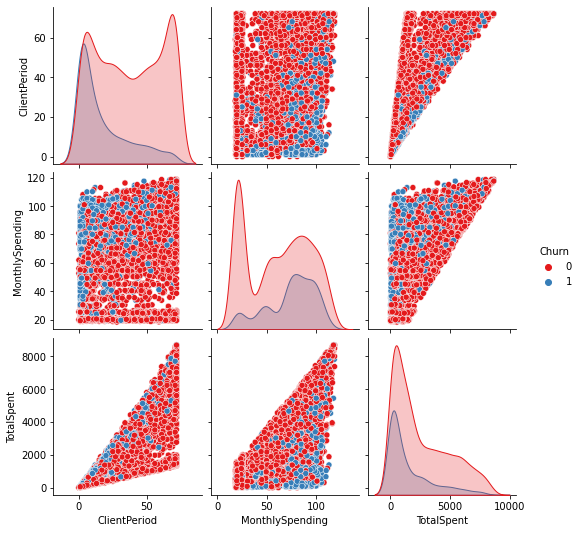

In [ ]:
sns.pairplot(data[num_cols+[target_col]], hue=target_col, palette='Set1');

Вообще мы видим, что при Churn=0 распределение ClientPeriod лежит существенно правее (большие значения), чем при Churn=1. А распределение MonthlySpending, напротив, имеет выраженный всплеск слева (малые значения).

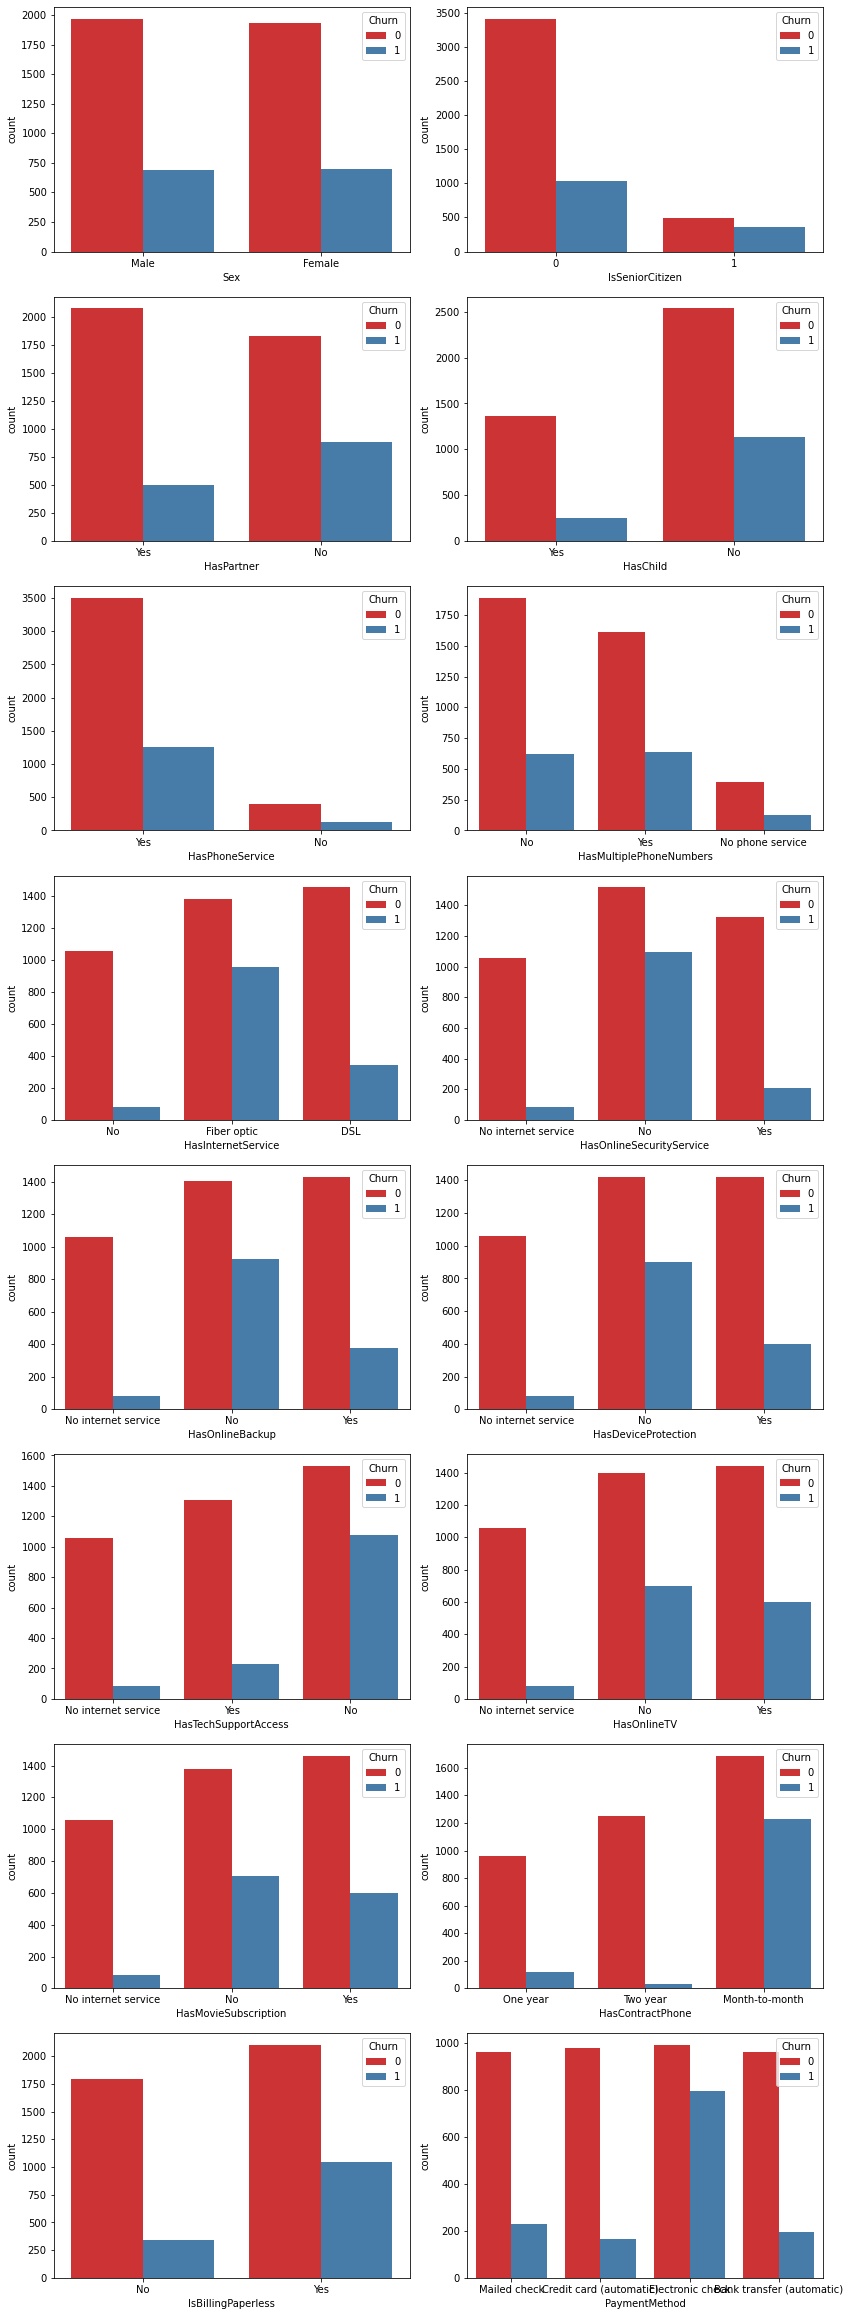

In [ ]:
fig = plt.figure(figsize=(12, 4*len(cat_cols)))
for idx, col in enumerate(cat_cols):
    ax=fig.add_subplot(len(cat_cols), 2, idx+1)
    sns.countplot(x=col, data=data, hue=target_col, palette='Set1');
plt.tight_layout()

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [ ]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_auc_score, roc_curve

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а.

Отнормируем числовые признаки:

In [ ]:
X = data.copy()
for col in num_cols:
  X[f'{col}_norm'] = (X[col]-X[col].mean())/X[col].std()
X.sample(3)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn,ClientPeriod_norm,MonthlySpending_norm,TotalSpent_norm
265,71,25.45,1813.35,Female,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),0,1.572402,-1.308131,-0.208958
4970,60,84.95,4984.85,Male,0,No,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,0,1.124343,0.663605,1.188764
2770,7,69.55,521.35,Male,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,0,-1.034488,0.153273,-0.778360


Категориальные признаки закодируем с помощью one-hot-encoding'а.

In [ ]:
X = pd.concat([X, pd.get_dummies(data[cat_cols])], axis=1)
X.sample(5)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn,ClientPeriod_norm,MonthlySpending_norm,TotalSpent_norm,IsSeniorCitizen,Sex_Female,Sex_Male,HasPartner_No,HasPartner_Yes,HasChild_No,HasChild_Yes,HasPhoneService_No,HasPhoneService_Yes,HasMultiplePhoneNumbers_No,HasMultiplePhoneNumbers_No phone service,HasMultiplePhoneNumbers_Yes,HasInternetService_DSL,HasInternetService_Fiber optic,HasInternetService_No,HasOnlineSecurityService_No,HasOnlineSecurityService_No internet service,HasOnlineSecurityService_Yes,HasOnlineBackup_No,HasOnlineBackup_No internet service,HasOnlineBackup_Yes,HasDeviceProtection_No,HasDeviceProtection_No internet service,HasDeviceProtection_Yes,HasTechSupportAccess_No,HasTechSupportAccess_No internet service,HasTechSupportAccess_Yes,HasOnlineTV_No,HasOnlineTV_No internet service,HasOnlineTV_Yes,HasMovieSubscription_No,HasMovieSubscription_No internet service,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1933,70,104.00,7250.15,Male,0,No,No,Yes,Yes,Fiber optic,Yes,No,No,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),1,1.531670,1.294891,2.187112,0,0,1,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0
2150,29,20.00,540.05,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Electronic check,0,-0.138369,-1.488735,-0.770118,0,1,0,0,1,0,1,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0
1899,24,54.15,1240.25,Female,0,No,No,No,No phone service,DSL,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),1,-0.342032,-0.357058,-0.461531,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,1,0,0
4947,34,26.10,980.35,Male,0,No,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),0,0.065294,-1.286591,-0.576072,0,0,1,1,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,0
2043,17,66.70,1077.05,Male,0,Yes,Yes,Yes,Yes,DSL,No,Yes,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,0,-0.627161,0.058829,-0.533455,0,0,1,0,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1


In [ ]:
X = X.iloc[:,data.shape[1]:]
X.sample(3)

,ClientPeriod_norm,MonthlySpending_norm,TotalSpent_norm,IsSeniorCitizen,Sex_Female,Sex_Male,HasPartner_No,HasPartner_Yes,HasChild_No,HasChild_Yes,HasPhoneService_No,HasPhoneService_Yes,HasMultiplePhoneNumbers_No,HasMultiplePhoneNumbers_No phone service,HasMultiplePhoneNumbers_Yes,HasInternetService_DSL,HasInternetService_Fiber optic,HasInternetService_No,HasOnlineSecurityService_No,HasOnlineSecurityService_No internet service,HasOnlineSecurityService_Yes,HasOnlineBackup_No,HasOnlineBackup_No internet service,HasOnlineBackup_Yes,HasDeviceProtection_No,HasDeviceProtection_No internet service,HasDeviceProtection_Yes,HasTechSupportAccess_No,HasTechSupportAccess_No internet service,HasTechSupportAccess_Yes,HasOnlineTV_No,HasOnlineTV_No internet service,HasOnlineTV_Yes,HasMovieSubscription_No,HasMovieSubscription_No internet service,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
400,-1.238151,-0.632107,-0.961586,0,1,0,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
2789,1.002145,0.009121,0.617159,0,1,0,0,1,0,1,0,1,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0
2700,1.572402,0.560876,1.602836,0,1,0,0,1,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1,0,1,0,0,0


In [ ]:
y = data[target_col]

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC.

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C).

Подберем параметр с помощью LogisticRegressionCV.

Разделим выборку на тестовую и обучающую.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, 
                                                    train_size=0.8,
                                                    random_state=17)

In [ ]:
clf = LogisticRegressionCV(cv=5, random_state=17, scoring='roc_auc', refit=True, max_iter=10000)
clf.fit(X_train, y_train)
clf.predict(X_test)

array([0, 1, 1, ..., 1, 0, 0])

Значение ROC_AUC:

In [ ]:
roc_auc_score(clf.predict(X_test), y_test)

0.7442227564102565

Сами предсказанные значения:

In [ ]:
 y_test

array([0, 0, 1, ..., 1, 0, 0])

Подберем параметры с помощью GridSearchCV:

In [ ]:
parametersGrid = {"C": [1000, 100, 10, 1, 0.1, 0.01, 0.001, 0.0001],
                  "penalty": ['l1', 'l2', 'elasticnet', 'none'],
                  "class_weight": [{0: 1, 1: 4}, {0: 1, 1: 1}, "balanced"],
                  "random_state": [71],
                  "solver": ['newton-cg', 'lbfgs', 'sag'],
                  "l1_ratio": np.arange(0, 1.2, 0.2)}

grid_linear = GridSearchCV(LogisticRegression(), parametersGrid, scoring="roc_auc", cv=7, n_jobs = -1, verbose=10, refit=True)
grid_linear.fit(X_train, y_train)

Fitting 7 folds for each of 1728 candidates, totalling 12096 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1716s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0107s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  62 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 134 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 178 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 222 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done 274 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 326 tasks      | elapsed:   12.5s
[Parallel(n_jo

GridSearchCV(cv=7, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [1000, 100, 10, 1, 0.1, 0.01, 0.001, 0.0001],
                         'class_weight': [{0: 1, 1: 4}, {0: 1, 1: 1},
                                          'balanced'],
                         'l1_ratio': array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
     

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

Лучшие параметры:

In [ ]:
grid_linear.best_params_

{'C': 1000,
 'class_weight': {0: 1, 1: 1},
 'l1_ratio': 0.0,
 'penalty': 'l2',
 'random_state': 71,
 'solver': 'sag'}

Значение ROC-AUC:

In [ ]:
roc_auc_score(grid_linear.predict(X_test), y_test)

0.7442227564102565

Сами предсказанные значения:

In [ ]:
y_test

array([0, 0, 1, ..., 1, 0, 0])

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [ ]:
!pip install catboost

     |████████████████████████████████| 67.3MB 56kB/s 


In [ ]:
from catboost import CatBoostClassifier, Pool

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

In [ ]:
X_train_origin, X_test_origin, y_train, y_test = train_test_split(data[num_cols+cat_cols], data[target_col], 
                                                       train_size=0.8, random_state=71)

In [ ]:
boosting_model = CatBoostClassifier(n_estimators=200, cat_features=cat_cols)

boosting_model.fit(X_train_origin, y_train)

y_train_predicted = boosting_model.predict_proba(X_train_origin)[:, 1]
y_test_predicted = boosting_model.predict_proba(X_test_origin)[:, 1]

Learning rate set to 0.083391
0:	total: 14.4ms	remaining: 2.87s
1:	total: 26.9ms	remaining: 2.66s
2:	total: 40.3ms	remaining: 2.64s
3:	total: 53.7ms	remaining: 2.63s
4:	total: 68.9ms	remaining: 2.69s
5:	total: 80.5ms	remaining: 2.6s
6:	total: 96.4ms	remaining: 2.66s
7:	total: 108ms	remaining: 2.59s
8:	total: 122ms	remaining: 2.6s
9:	total: 137ms	remaining: 2.59s
10:	total: 150ms	remaining: 2.58s
11:	total: 164ms	remaining: 2.57s
12:	total: 178ms	remaining: 2.57s
13:	total: 193ms	remaining: 2.57s
14:	total: 212ms	remaining: 2.61s
15:	total: 227ms	remaining: 2.61s
16:	total: 240ms	remaining: 2.58s
17:	total: 253ms	remaining: 2.56s
18:	total: 268ms	remaining: 2.55s
19:	total: 282ms	remaining: 2.54s
20:	total: 296ms	remaining: 2.52s
21:	total: 303ms	remaining: 2.45s
22:	total: 318ms	remaining: 2.45s
23:	total: 333ms	remaining: 2.44s
24:	total: 341ms	remaining: 2.39s
25:	total: 354ms	remaining: 2.37s
26:	total: 368ms	remaining: 2.35s
27:	total: 379ms	remaining: 2.33s
28:	total: 394ms	remain

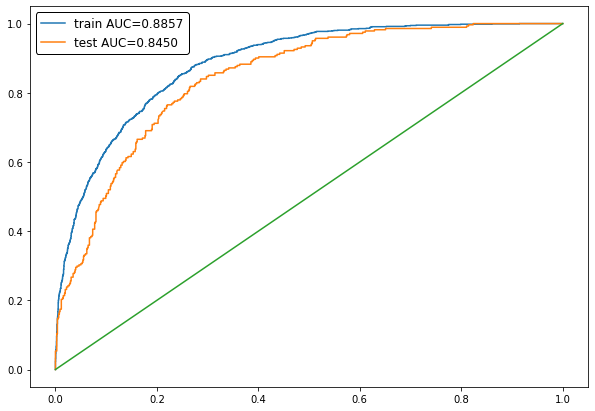

In [ ]:
train_auc = roc_auc_score(y_train, y_train_predicted)
test_auc = roc_auc_score(y_test, y_test_predicted)

plt.figure(figsize=(10,7))
plt.plot(*roc_curve(y_train, y_train_predicted)[:2], label='train AUC={:.4f}'.format(train_auc))
plt.plot(*roc_curve(y_test, y_test_predicted)[:2], label='test AUC={:.4f}'.format(test_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию.

Попробуем выполнить поиск лучших параметров по сетке.

In [ ]:
boosting_model = CatBoostClassifier(silent=True, cat_features=cat_cols, eval_metric='AUC:hints=skip_train~false')
best_model = boosting_model.grid_search({'l2_leaf_reg': np.linspace(0, 1, 21), 'n_estimators': [100, 200, 300, 500, 750, 1000]}, 
                                        X_train_origin, y_train, plot=True, refit=True, shuffle=True, train_size=0.50, cv=7)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


bestTest = 0.8370569418
bestIteration = 98

0:	loss: 0.8370569	best: 0.8370569 (0)	total: 750ms	remaining: 1m 33s

bestTest = 0.8392182865
bestIteration = 97

1:	loss: 0.8392183	best: 0.8392183 (1)	total: 1.36s	remaining: 1m 24s

bestTest = 0.8383161752
bestIteration = 99

2:	loss: 0.8383162	best: 0.8392183 (1)	total: 1.97s	remaining: 1m 20s

bestTest = 0.8356761473
bestIteration = 99

3:	loss: 0.8356761	best: 0.8392183 (1)	total: 2.58s	remaining: 1m 18s

bestTest = 0.8392979701
bestIteration = 98

4:	loss: 0.8392980	best: 0.8392980 (4)	total: 3.16s	remaining: 1m 16s

bestTest = 0.837725237
bestIteration = 97

5:	loss: 0.8377252	best: 0.8392980 (4)	total: 3.78s	remaining: 1m 15s

bestTest = 0.8381312162
bestIteration = 86

6:	loss: 0.8381312	best: 0.8392980 (4)	total: 4.37s	remaining: 1m 14s

bestTest = 0.8372064212
bestIteration = 99

7:	loss: 0.8372064	best: 0.8392980 (4)	total: 4.97s	remaining: 1m 13s

bestTest = 0.8382108998
bestIteration = 80

8:	loss: 0.8382109	best: 0.8392980 (

In [ ]:
best_model['params']

{'iterations': 200, 'l2_leaf_reg': 1.0}

In [ ]:
best_params = best_model['params']
boosting_model = CatBoostClassifier(**best_params, cat_features=cat_cols, eval_metric='AUC')
boosting_model.fit(X_train_origin, y_train)

0:	total: 16.2ms	remaining: 3.21s
1:	total: 29.3ms	remaining: 2.9s
2:	total: 44.9ms	remaining: 2.95s
3:	total: 51.7ms	remaining: 2.53s
4:	total: 65.3ms	remaining: 2.55s
5:	total: 80ms	remaining: 2.59s
6:	total: 94.3ms	remaining: 2.6s
7:	total: 111ms	remaining: 2.65s
8:	total: 124ms	remaining: 2.64s
9:	total: 134ms	remaining: 2.54s
10:	total: 150ms	remaining: 2.57s
11:	total: 164ms	remaining: 2.57s
12:	total: 179ms	remaining: 2.57s
13:	total: 194ms	remaining: 2.58s
14:	total: 206ms	remaining: 2.54s
15:	total: 226ms	remaining: 2.6s
16:	total: 242ms	remaining: 2.61s
17:	total: 257ms	remaining: 2.6s
18:	total: 274ms	remaining: 2.61s
19:	total: 292ms	remaining: 2.63s
20:	total: 309ms	remaining: 2.63s
21:	total: 320ms	remaining: 2.59s
22:	total: 333ms	remaining: 2.56s
23:	total: 345ms	remaining: 2.53s
24:	total: 361ms	remaining: 2.53s
25:	total: 376ms	remaining: 2.52s
26:	total: 402ms	remaining: 2.57s
27:	total: 419ms	remaining: 2.57s
28:	total: 439ms	remaining: 2.59s
29:	total: 458ms	remain

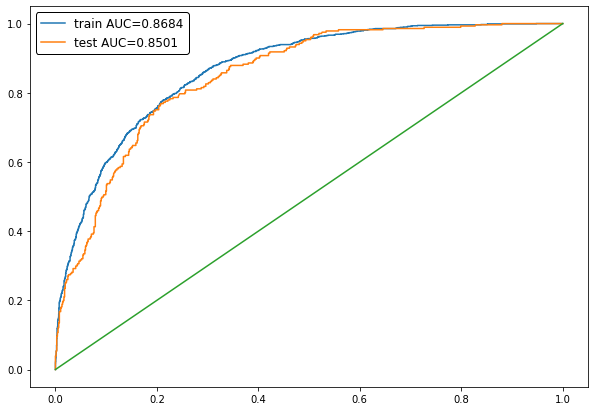

In [ ]:
y_train_predicted = boosting_model.predict_proba(X_train_origin)[:, 1]
y_test_predicted = boosting_model.predict_proba(X_test_origin)[:, 1]

train_auc = roc_auc_score(y_train, y_train_predicted)
test_auc = roc_auc_score(y_test, y_test_predicted)

plt.figure(figsize=(10,7))
plt.plot(*roc_curve(y_train, y_train_predicted)[:2], label='train AUC={:.4f}'.format(train_auc))
plt.plot(*roc_curve(y_test, y_test_predicted)[:2], label='test AUC={:.4f}'.format(test_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

In [ ]:
# boosting_model = CatBoostClassifier(n_estimators=200, silent=True, cat_features=cat_cols, eval_metric='AUC')

# # params = #{'iterations': [500],
# #           'depth': [4, 5, 6],
# #           'loss_function': ['Logloss', 'CrossEntropy'],
# params = {'l2_leaf_reg': np.linspace(0, 1, 10),
#           'custom_metric': ['AUC:hints=skip_train~false']}#,
#           #'depth': [4, 5, 6]}
# #           'leaf_estimation_iterations': [10],
# # #           'eval_metric': ['Accuracy'],
# # #           'use_best_model': ['True'],
# #           'logging_level':['Silent'],
# #           'random_seed': [42]
#         #  }

# cat_grid = boosting_model.grid_search(params, X_train_origin, y_train, plot=True, refit=True)

In [ ]:
# print(boosting_model.get_params())

# y_train_predicted = boosting_model.predict_proba(X_train_origin)[:, 1]
# y_test_predicted = boosting_model.predict_proba(X_test_origin)[:, 1]

# train_auc = roc_auc_score(y_train, y_train_predicted)
# test_auc = roc_auc_score(y_test, y_test_predicted)

# plt.figure(figsize=(10,7))
# plt.plot(*roc_curve(y_train, y_train_predicted)[:2], label='train AUC={:.4f}'.format(train_auc))
# plt.plot(*roc_curve(y_test, y_test_predicted)[:2], label='test AUC={:.4f}'.format(test_auc))
# legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
# legend_box.set_facecolor("white")
# legend_box.set_edgecolor("black")
# plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
# plt.show()

In [ ]:
boosting_model = CatBoostClassifier(n_estimators=200, silent=True, cat_features=cat_cols, eval_metric='AUC:hints=skip_train~false')

# params = #{'iterations': [500],
#           'depth': [4, 5, 6],
#           'loss_function': ['Logloss', 'CrossEntropy'],
params = {'l2_leaf_reg': np.linspace(0, 1, 6),
          'iterations': [500, 1000],
          'depth': [4, 5, 7, 10],
#          'leaf_estimation_iterations': [10, 20],
          # 'use_best_model': ['True'],
#           'logging_level':['Silent'],
          'random_seed': [71]
         }

cat_grid = boosting_model.randomize_search(params,X_train_origin, y_train, plot=True, refit=True)

AttributeError: ignored

In [ ]:
boosting_model = CatBoostClassifier(silent=True, cat_features=cat_cols, eval_metric='AUC:hints=skip_train~false')

#           'loss_function': ['Logloss', 'CrossEntropy'],
params = {'l2_leaf_reg': np.linspace(0, 1, 6),
          'iterations': [200, 500, 1000],
          'depth': [4, 5, 7, 10],
#          'leaf_estimation_iterations': [10, 20],
#          'min_data_in_leaf': [1, 2, 3], # 1
          'random_seed': [71]
         }

best_model = boosting_model.randomized_search(params,X_train_origin, y_train, plot=True, refit=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


bestTest = 0.8509380425
bestIteration = 197

0:	loss: 0.8509380	best: 0.8509380 (0)	total: 1.88s	remaining: 16.9s

bestTest = 0.8509380425
bestIteration = 197

1:	loss: 0.8509380	best: 0.8509380 (0)	total: 3.62s	remaining: 14.5s

bestTest = 0.8531336164
bestIteration = 230

2:	loss: 0.8531336	best: 0.8531336 (2)	total: 7.95s	remaining: 18.5s

bestTest = 0.8534691526
bestIteration = 282

3:	loss: 0.8534692	best: 0.8534692 (3)	total: 16.9s	remaining: 25.4s

bestTest = 0.8507119203
bestIteration = 199

4:	loss: 0.8507119	best: 0.8534692 (3)	total: 19.1s	remaining: 19.1s

bestTest = 0.8514924067
bestIteration = 289

5:	loss: 0.8514924	best: 0.8534692 (3)	total: 24.7s	remaining: 16.5s


KeyboardInterrupt: ignored

In [ ]:
boosting_model = CatBoostClassifier(silent=True, cat_features=cat_cols, eval_metric='AUC:hints=skip_train~false')

#           
params = {'l2_leaf_reg': np.linspace(0, 1, 21),
          'iterations': [200, 500, 750, 1000],
          'depth': [3, 4, 5, 6, 7, 10],
          'leaf_estimation_iterations': [10, 20],
          'min_data_in_leaf': [1, 2, 3, 4, 5], # 1
          'loss_function': ['Logloss', 'CrossEntropy'],
          'random_seed': [71]
         }

best_model = boosting_model.randomized_search(params, X_train_origin, y_train, plot=True, refit=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


bestTest = 0.8505587407
bestIteration = 262

0:	loss: 0.8505587	best: 0.8505587 (0)	total: 10.3s	remaining: 1m 32s

bestTest = 0.8530606737
bestIteration = 390

1:	loss: 0.8530607	best: 0.8530607 (1)	total: 15.2s	remaining: 1m

bestTest = 0.852546428
bestIteration = 232

2:	loss: 0.8525464	best: 0.8530607 (1)	total: 23.9s	remaining: 55.7s

bestTest = 0.8503508542
bestIteration = 199

3:	loss: 0.8503509	best: 0.8530607 (1)	total: 25.3s	remaining: 38s

bestTest = 0.8510802807
bestIteration = 194

4:	loss: 0.8510803	best: 0.8530607 (1)	total: 27.3s	remaining: 27.3s

bestTest = 0.8433264767
bestIteration = 59

5:	loss: 0.8433265	best: 0.8530607 (1)	total: 35.9s	remaining: 23.9s

bestTest = 0.8464775993
bestIteration = 203

6:	loss: 0.8464776	best: 0.8530607 (1)	total: 1m 1s	remaining: 26.3s

bestTest = 0.8554787226
bestIteration = 237

7:	loss: 0.8554787	best: 0.8554787 (7)	total: 1m 21s	remaining: 20.3s

bestTest = 0.8508468642
bestIteration = 276

8:	loss: 0.8508469	best: 0.8554787 (7)	

In [ ]:
boosting_model = CatBoostClassifier(silent=True, cat_features=cat_cols, eval_metric='AUC')

params = {'l2_leaf_reg': np.linspace(0, 1, 21),
#          'n_estimators': [200, 500, 750, 1000],
         }

best_model = boosting_model.randomized_search(params, X_train_origin, y_train, refit=True)


bestTest = 0.8492968328
bestIteration = 203

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
0:	loss: 0.8492968	best: 0.8492968 (0)	total: 14.8s	remaining: 2m 13s

bestTest = 0.8483923439
bestIteration = 191

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
1:	loss: 0.8483923	best: 0.8492968 (0)	total: 29.6s	remaining: 1m 58s

bestTest = 0.851280873
bestIteration = 278

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
2:	loss: 0.8512809	best: 0.8512809 (2)	total: 44.3s	remaining: 1m 43s

bestTest = 0.8510656922
bestIteration = 242

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
3:	loss: 0.8510657	best: 0.8512809 (2)	total: 59.2s	remaining: 1m 28s



In [ ]:
best_params = best_model['params']
cb = CatBoostClassifier(**best_params, eval_metric='AUC:hints=skip_train~false')
cb.fit(X_train_origin, y_train, cat_features=cat_cols)

0:	learn: 0.8082096	total: 17.6ms	remaining: 17.6s
1:	learn: 0.8157956	total: 31.8ms	remaining: 15.9s
2:	learn: 0.8244596	total: 45.6ms	remaining: 15.2s
3:	learn: 0.8302677	total: 59.9ms	remaining: 14.9s
4:	learn: 0.8297561	total: 75.1ms	remaining: 14.9s
5:	learn: 0.8306132	total: 88.6ms	remaining: 14.7s
6:	learn: 0.8316273	total: 104ms	remaining: 14.8s
7:	learn: 0.8313963	total: 118ms	remaining: 14.7s
8:	learn: 0.8316537	total: 133ms	remaining: 14.6s
9:	learn: 0.8327585	total: 144ms	remaining: 14.3s
10:	learn: 0.8331600	total: 158ms	remaining: 14.2s
11:	learn: 0.8334443	total: 165ms	remaining: 13.6s
12:	learn: 0.8351623	total: 182ms	remaining: 13.8s
13:	learn: 0.8358755	total: 196ms	remaining: 13.8s
14:	learn: 0.8376365	total: 212ms	remaining: 13.9s
15:	learn: 0.8379411	total: 231ms	remaining: 14.2s
16:	learn: 0.8381103	total: 238ms	remaining: 13.8s
17:	learn: 0.8385222	total: 252ms	remaining: 13.8s
18:	learn: 0.8397369	total: 268ms	remaining: 13.8s
19:	learn: 0.8410499	total: 283ms	r

In [ ]:
print(roc_auc_score(y_train, cb.predict_proba(X_train_origin)[:, 1]))
print(roc_auc_score(y_test, cb.predict_proba(X_test_origin)[:, 1]))

0.9201769328655237
0.8349368969439044


In [ ]:
best_params = best_model['params']
best_params

{'l2_leaf_reg': 0.95}

In [4]:
 import numpy as np
 np.linspace(0, 0.3, 7)

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 ])

0.8554787
{'depth': 7,
 'iterations': 1000,
 'l2_leaf_reg': 0.45,
 'leaf_estimation_iterations': 10,
 'min_data_in_leaf': 4,
 'random_seed': 71}

0.8553407
{'depth': 3,
 'iterations': 750,
 'l2_leaf_reg': 0.8,
 'leaf_estimation_iterations': 20,
 'min_data_in_leaf': 1,
 'random_seed': 17}

0.853224 {'depth': 5,
 'iterations': 750,
 'l2_leaf_reg': 0.95,
 'leaf_estimation_iterations': 10,
 'min_data_in_leaf': 4,
 'random_seed': 17}

In [ ]:
train_pool = Pool(X_train_origin, y_train, cat_features=cat_cols)

In [ ]:
best_params = best_model['params']
boosting_model = CatBoostClassifier(**best_params,
                                            cat_features=cat_cols, eval_metric='AUC:hints=skip_train~false')#, use_best_model=True)

boosting_model.fit(X_train_origin, y_train)

0:	learn: 0.8082096	total: 15.7ms	remaining: 15.7s
1:	learn: 0.8157956	total: 30ms	remaining: 15s
2:	learn: 0.8244596	total: 44.8ms	remaining: 14.9s
3:	learn: 0.8302677	total: 58.6ms	remaining: 14.6s
4:	learn: 0.8297561	total: 77ms	remaining: 15.3s
5:	learn: 0.8306132	total: 90.4ms	remaining: 15s
6:	learn: 0.8316273	total: 113ms	remaining: 16s
7:	learn: 0.8313963	total: 128ms	remaining: 15.8s
8:	learn: 0.8316537	total: 143ms	remaining: 15.8s
9:	learn: 0.8327585	total: 155ms	remaining: 15.3s
10:	learn: 0.8331600	total: 170ms	remaining: 15.3s
11:	learn: 0.8334443	total: 177ms	remaining: 14.5s
12:	learn: 0.8351623	total: 192ms	remaining: 14.6s
13:	learn: 0.8358755	total: 205ms	remaining: 14.4s
14:	learn: 0.8376365	total: 226ms	remaining: 14.8s
15:	learn: 0.8379411	total: 242ms	remaining: 14.9s
16:	learn: 0.8381103	total: 248ms	remaining: 14.4s
17:	learn: 0.8385222	total: 263ms	remaining: 14.3s
18:	learn: 0.8397369	total: 279ms	remaining: 14.4s
19:	learn: 0.8410499	total: 295ms	remaining: 

In [ ]:
y_test_predicted = boosting_model.predict_proba(X_test_origin)[:, 1]
roc_auc_score(y_test, y_test_predicted)

0.8349368969439044

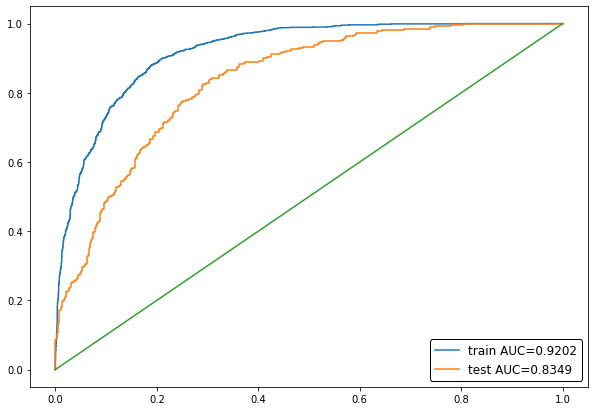

In [ ]:
y_train_predicted = boosting_model.predict_proba(X_train_origin)[:, 1]
y_test_predicted = boosting_model.predict_proba(X_test_origin)[:, 1]

train_auc = roc_auc_score(y_train, y_train_predicted)
test_auc = roc_auc_score(y_test, y_test_predicted)

plt.figure(figsize=(10,7))
plt.plot(*roc_curve(y_train, y_train_predicted)[:2], label='train AUC={:.4f}'.format(train_auc))
plt.plot(*roc_curve(y_test, y_test_predicted)[:2], label='test AUC={:.4f}'.format(test_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

In [ ]:
print(boosting_model.best_score_)
print(boosting_model.get_all_params())

{'learn': {'Logloss': 0.3379726804050959, 'AUC': 0.9071442220070706}}
{'nan_mode': 'Min', 'eval_metric': 'AUC:hints=skip_train~false', 'combinations_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1', 'Counter:CtrBorderCount=15:CtrBorderType=Uniform:Prior=0/1'], 'iterations': 1000, 'sampling_frequency': 'PerTree', 'fold_permutation_block': 0, 'leaf_estimation_method': 'Newton', 'counter_calc_method': 'SkipTest', 'grow_policy': 'SymmetricTree', 'penalties_coefficient': 1, 'boosting_type': 'Plain', 'model_shrink_mode': 'Constant', 'feature_border_type': 'GreedyLogSum', 'ctr_leaf_count_limit': 18446744073709551615, 'bayesian_matrix_reg': 0.10000000149011612, 'one_hot_max_size': 2, 'l2_leaf_reg': 0.20000000298023224, 'random_strength': 1, 'rsm': 1, 'boost_from_average': False, 'max_ctr_complexity': 4, 'model_size_reg': 0.5, 'simple_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=

In [ ]:
for key,value in boosting_model.get_all_params().items():
 print('{}, {}'.format(key,value))

nan_mode, Min
eval_metric, AUC:hints=skip_train~false
combinations_ctr, ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1', 'Counter:CtrBorderCount=15:CtrBorderType=Uniform:Prior=0/1']
iterations, 1000
sampling_frequency, PerTree
fold_permutation_block, 0
leaf_estimation_method, Newton
counter_calc_method, SkipTest
grow_policy, SymmetricTree
penalties_coefficient, 1
boosting_type, Plain
model_shrink_mode, Constant
feature_border_type, GreedyLogSum
ctr_leaf_count_limit, 18446744073709551615
bayesian_matrix_reg, 0.10000000149011612
one_hot_max_size, 2
l2_leaf_reg, 0.20000000298023224
random_strength, 1
rsm, 1
boost_from_average, False
max_ctr_complexity, 4
model_size_reg, 0.5
simple_ctr, ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1', 'Counter:CtrBorderCount=15:CtrBorderType=Uniform:Prior=0/1']
pool_metainfo_options, {'tags': 

# Предсказания

In [ ]:
best_model = cat_grid # какая-то предыдущая модель

In [ ]:
best_model.predict_proba(X_test)[:, 1]

array([0.04913392, 0.66064707, 0.68420946, ..., 0.79440401, 0.58177181,
       0.01646595])

In [ ]:
best_model.predict(X_test)

array([0, 1, 1, ..., 1, 1, 0])

In [ ]:
X_test = pd.read_csv('test.csv')
submission = pd.read_csv('submission.csv')
submission['Churn'] = best_model.predict_proba(X_test)[:, 1] # best_model.predict_proba(X_test) / best_model.predict(X_test)
submission.to_csv('my_submission.csv', index=False)

In [ ]:
submission.head()

,Id,Churn
0,0,0.049134
1,1,0.660647
2,2,0.684209
3,3,0.010534
4,4,0.007641


# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.